In [6]:
# Essential libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('/content/Symptom2Disease.csv')  # Replace with your dataset path

# Preprocess the text data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.lower().split()
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

data['processed_text'] = data['text'].apply(preprocess_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


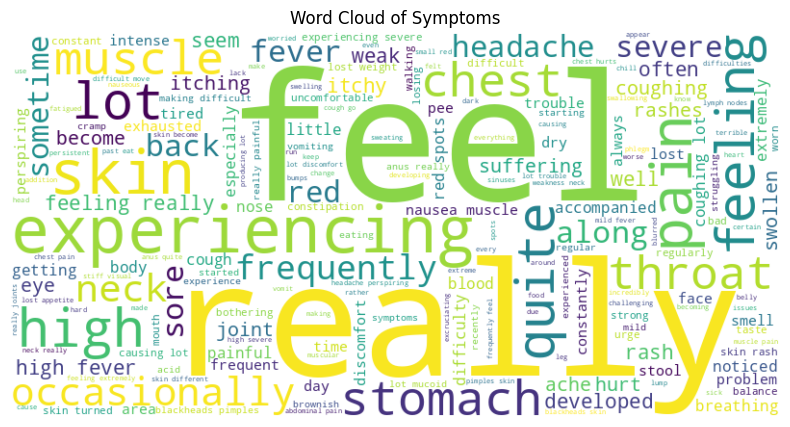

In [7]:
# Generate a list of all preprocessed symptoms
preprocessed_symptoms = data['processed_text'].tolist()

# Create a single string containing all symptoms for the word cloud
all_text = ' '.join(preprocessed_symptoms)

# Generate the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plotting Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Symptoms')
plt.show()


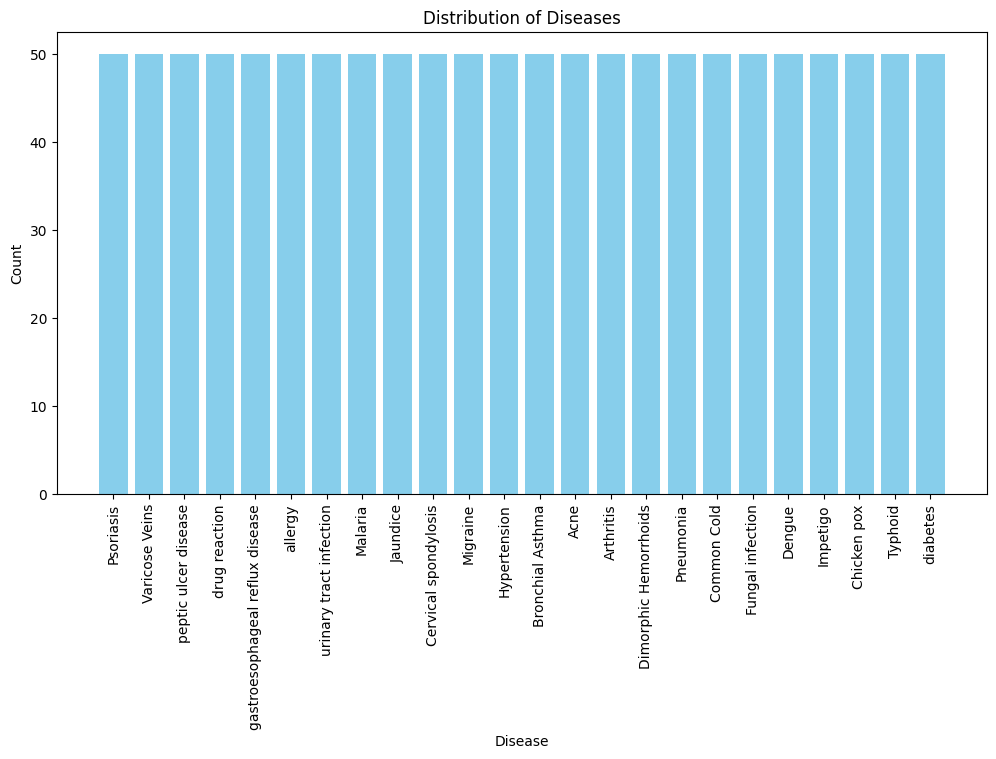

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each disease
disease_counts = data['label'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(12, 6))
plt.bar(disease_counts.index, disease_counts.values, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of Diseases')
plt.xticks(rotation=90)
plt.show()

In [9]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))
tfidf_features = tfidf_vectorizer.fit_transform(data['processed_text']).toarray()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_features, data['label'], test_size=0.2, random_state=42
)

# KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Random Forest Classifier with GridSearchCV
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5, scoring='accuracy'
)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Results
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print("Classification Report for KNN:")
print(classification_report(y_test, knn_predictions))

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))


KNN Accuracy: 0.92
Classification Report for KNN:
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       0.92      1.00      0.96        11
           Cervical spondylosis       0.88      1.00      0.93         7
                    Chicken pox       0.75      1.00      0.86        12
                    Common Cold       0.92      0.92      0.92        12
                         Dengue       0.67      0.67      0.67        12
          Dimorphic Hemorrhoids       0.78      1.00      0.88         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11


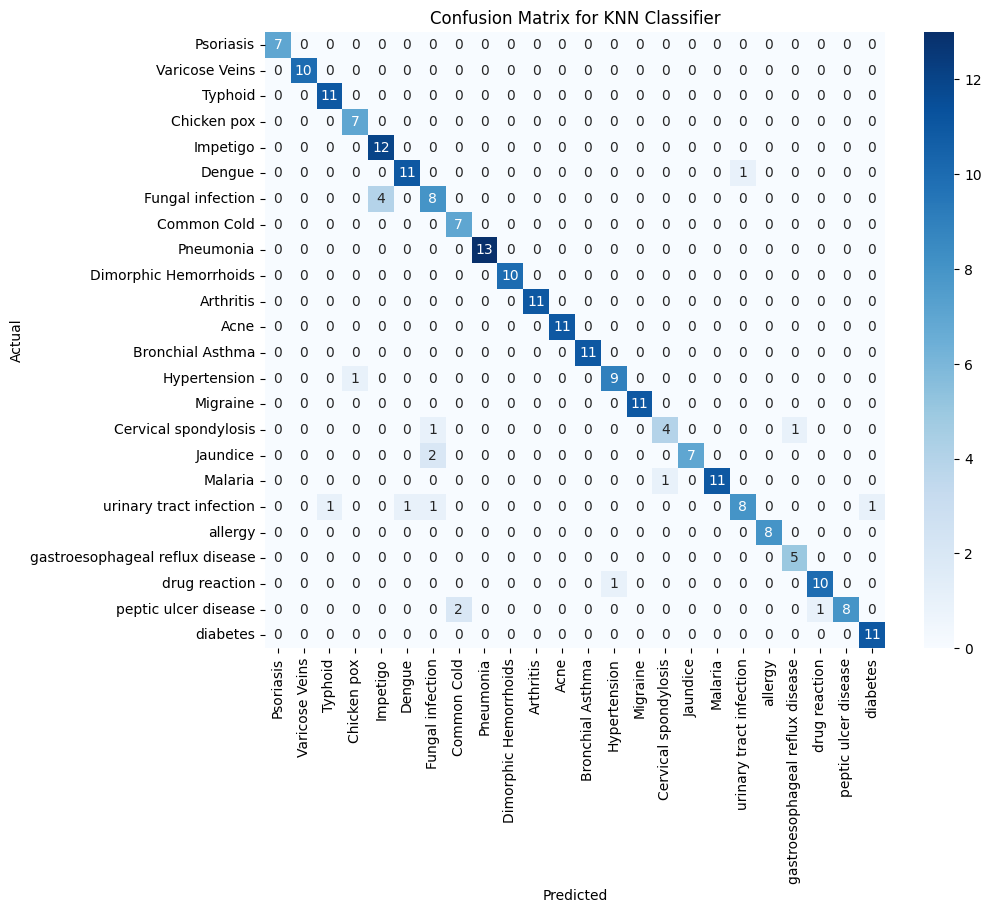

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix (e.g., for KNN predictions)
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['label'].unique(), yticklabels=data['label'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Optionally, you can do the same for Random Forest predictions:
# conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
# sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=data['label'].unique(), yticklabels=data['label'].unique())


In [13]:
symptom = input("Enter a symptom: ")

preprocessed_symptom = preprocess_text(symptom)

symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptom])

predicted_disease = knn_classifier.predict(symptom_tfidf)
print(f'Predicted Disease: {predicted_disease[0]}')

Enter a symptom: fever
Predicted Disease: Chicken pox
